In [191]:
import numpy as np
from numpy import sin,cos,tan,pi
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

In order to calculate the error of our method for the resulution of the PDE, we are going before to caracterize the numerical laplacian

In [205]:
def DDx_per(M,dx):
    I,J = M.shape
    ddxM = np.zeros([I,J])
    for j in range(J):
        if j == J-1:
            ddxM[:,j] = (M[:,2]-2*M[:,j]+M[:,j-2])/dx**2
        elif j == 0:
            ddxM[:,j] = (M[:,j+2]-2*M[:,j]+M[:,-3])/dx**2
        elif j == 1:
            ddxM[:,j] = (M[:,j+2]-2*M[:,j]+M[:,-2])/dx**2
        elif j == J-2:
            ddxM[:,j] = (M[:,1]-2*M[:,j]+M[:,j-2])/dx**2
        else:
            ddxM[:,j] = (M[:,j+2]-2*M[:,j]+M[:,j-2])/dx**2
    return ddxM

def DDy_per(M,dy):
    I,J = M.shape
    ddyM = np.zeros([I,J])
    for i in range(I):
        if i == I-1:
            ddyM[i,:] = (M[2,:]-2*M[i,:]+M[i-2,:])/dy**2
        elif i == 0:
            ddyM[i,:] = (M[i+2,:]-2*M[i,:]+M[-3,:])/dy**2
        elif i == 1:
            ddyM[i,:] = (M[i+2,:]-2*M[i,:]+M[-2,:])/dy**2
        elif i == I-2:
            ddyM[i,:] = (M[1,:]-2*M[i,:]+M[i-2,:])/dy**2
        else:
            ddyM[i,:] = (M[i+2,:]-2*M[i,:]+M[i-2,:])/dy**2
    return ddyM

def DDx_Neu(M,dx,Bound_left,Bound_right):
    I,J = M.shape
    ddxM = np.zeros([I,J])
    for j in range(1,J-1):
        if j == J-1:
            ddxM[:,j] = (Bound_right-2*M[:,j]+M[:,j-1])/dx**2
        elif j == 0:
            ddxM[:,j] = (M[:,j+1]-2*M[:,j]+Bound_left)/dx**2
        else:
            ddxM[:,j] = (M[:,j+1]-2*M[:,j]+M[:,j-1])/dx**2
    return ddxM
def DDy_Neu(M,dy,Bound_up,Bound_down):
    I,J = M.shape
    ddyM = np.zeros([I,J])
    for i in range(1,I-1):
        if i == I-1:
            ddyM[i,:] = (Bound_down-2*M[i,:]+M[i-1,:])/dy**2
        elif i == 0:
            ddyM[i,:] = (M[i+1,:]-2*M[i,:]+Bound_up)/dy**2
        else:
            ddyM[i,:] = (M[i+1,:]-2*M[i,:]+M[i-1,:])/dy**2
    return ddyM

In [206]:
Er = []
N = np.concatenate((np.arange(10,500,20),np.arange(500,2000,100),np.arange(2000,7000,500)))
for N_sp in tqdm(N):
    L = 2*pi
    dx = L/(N_sp-1)
    xvec = np.linspace(0,L,N_sp)
    yvec = np.linspace(0,L,N_sp)
    [X,Y] = np.meshgrid(xvec,yvec)
    u = sin(X)*sin(Y)
    Lapu = -2*u
    Lap_num = DDx_Neu(u,dx,0,0)+DDy_Neu(u,dx,0,0)
    Error = np.mean(np.abs(Lapu[1:N_sp-1,1:N_sp-1]-Lap_num[1:N_sp-1,1:N_sp-1]))
    Er.append(Error)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.82it/s]


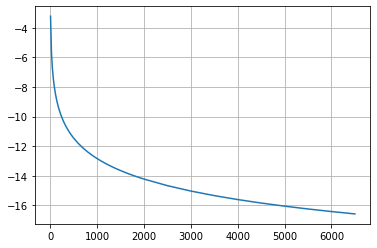

In [216]:
plt.plot(N,np.log(np.abs(Er)))
plt.grid()

In [306]:
class poisson_equation():
    def __init__(self,rho,N,L,kmax = 60,mu = 1e-3,precision = 1e-6):
        self.kmax = kmax
        self.N = N
        self.L = L
        self.u = []
        self.dx = L/N
        self.mu = mu
        self.rho = rho
        self.precision = precision
        [self.X,self.Y] = np.meshgrid(np.linspace(0,L,N),np.linspace(0,L,N))
    def jacobi_solver(self):
        phi_new = np.zeros([N,N])
        phi = phi_new
        k = 0
        while k < self.kmax:
            for i in range(1,N-1):
                for j in range(1,N-1):
                    phi_new[i,j] =0.25*((phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])-self.dx**2*self.rho[i,j]/self.mu)
            if 2*np.mean(np.abs(phi-phi_new))/np.mean(np.abs(phi+phi_new)) < self.precision:
                break
            k+=1
        self.u = phi
    def get_u(self):
        return self.u

In [314]:
N = 50
p = np.ones([N,N])*1000
test = poisson_equation(p,N,0.5,mu = 1e-1)

In [315]:
test.jacobi_solver()

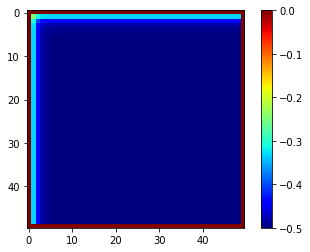

In [316]:
plt.imshow(test.get_u(),cmap = 'jet')
plt.colorbar()